In [31]:
# Import libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, auc
from scipy.stats import uniform, randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [32]:
# Load the data cleaned in the previous step
all_data_df = pd.read_csv("C:/Users/juane/OneDrive/Escritorio/Datos/Kaggle_Titanic/cleaned_data.csv")

In [33]:
# Feature Engineering: Create new features
all_data_df['TotalSpending'] = all_data_df['RoomService'] + all_data_df['FoodCourt'] + all_data_df['ShoppingMall'] + all_data_df['Spa'] + all_data_df['VRDeck']
all_data_df['SpendingPerAge'] = all_data_df['TotalSpending'] / (all_data_df['Age'] + 1)  # +1 to avoid division by zero

In [34]:
# One-Hot Encoding for categorical variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
encoded_features = one_hot_encoder.fit_transform(all_data_df[categorical_columns])

c:\Users\juane\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
# Define features and target variable
X = all_data_df.drop('Transported', axis=1)
y = all_data_df['Transported']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# One-Hot Encoding for categorical variables
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
X_train_encoded = one_hot_encoder.transform(X_train[categorical_columns])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_columns])

# Drop original categorical columns and concatenate encoded columns
X_train = X_train.drop(categorical_columns, axis=1)
X_test = X_test.drop(categorical_columns, axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))], axis=1)

# Crear el escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test = scaler.transform(X_test)

In [38]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier(random_state=42)

In [39]:
# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [41]:
# Get predicted probabilities for ROC-AUC
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
y_pred_proba_gb = gb_clf.predict_proba(X_test)[:, 1]
y_pred_proba_svm = svm_clf.predict_proba(X_test)[:, 1]
y_pred_proba_knn = knn_clf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

In [42]:
# Evaluate models
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, roc_auc

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg, y_pred_proba_log_reg)
rf_metrics = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)
gb_metrics = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb)
svm_metrics = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm)
knn_metrics = evaluate_model(y_test, y_pred_knn, y_pred_proba_knn)
xgb_metrics = evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb)

In [43]:
# Print evaluation metrics
print(f"Logistic Regression: Accuracy={log_reg_metrics[0]:.2f}, Precision={log_reg_metrics[1]:.2f}, Recall={log_reg_metrics[2]:.2f}, F1-Score={log_reg_metrics[3]:.2f}, ROC-AUC={log_reg_metrics[4]:.2f}")
print(f"Random Forest: Accuracy={rf_metrics[0]:.2f}, Precision={rf_metrics[1]:.2f}, Recall={rf_metrics[2]:.2f}, F1-Score={rf_metrics[3]:.2f}, ROC-AUC={rf_metrics[4]:.2f}")
print(f"Gradient Boosting: Accuracy={gb_metrics[0]:.2f}, Precision={gb_metrics[1]:.2f}, Recall={gb_metrics[2]:.2f}, F1-Score={gb_metrics[3]:.2f}, ROC-AUC={gb_metrics[4]:.2f}")
print(f"SVM: Accuracy={svm_metrics[0]:.2f}, Precision={svm_metrics[1]:.2f}, Recall={svm_metrics[2]:.2f}, F1-Score={svm_metrics[3]:.2f}, ROC-AUC={svm_metrics[4]:.2f}")
print(f"KNN: Accuracy={knn_metrics[0]:.2f}, Precision={knn_metrics[1]:.2f}, Recall={knn_metrics[2]:.2f}, F1-Score={knn_metrics[3]:.2f}, ROC-AUC={knn_metrics[4]:.2f}")
print(f"XGBoost: Accuracy={xgb_metrics[0]:.2f}, Precision={xgb_metrics[1]:.2f}, Recall={xgb_metrics[2]:.2f}, F1-Score={xgb_metrics[3]:.2f}, ROC-AUC={xgb_metrics[4]:.2f}")

Logistic Regression: Accuracy=0.71, Precision=0.73, Recall=0.90, F1-Score=0.80, ROC-AUC=0.77
Random Forest: Accuracy=0.71, Precision=0.77, Recall=0.81, F1-Score=0.79, ROC-AUC=0.77
Gradient Boosting: Accuracy=0.73, Precision=0.78, Recall=0.82, F1-Score=0.80, ROC-AUC=0.79
SVM: Accuracy=0.69, Precision=0.69, Recall=0.95, F1-Score=0.80, ROC-AUC=0.79
KNN: Accuracy=0.69, Precision=0.75, Recall=0.79, F1-Score=0.77, ROC-AUC=0.72
XGBoost: Accuracy=0.71, Precision=0.75, Recall=0.84, F1-Score=0.79, ROC-AUC=0.77


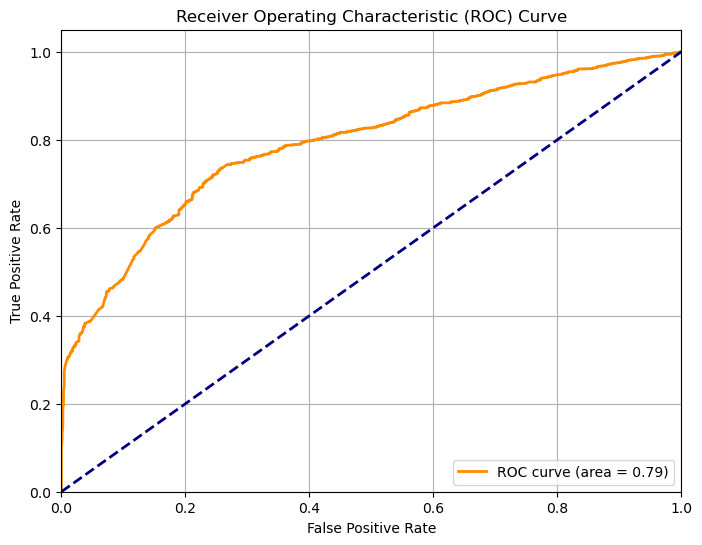

In [44]:
# Plot ROC Curve for the best model - Gradient Boosting
best_model = gb_clf
y_pred_proba_best = y_pred_proba_gb

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\juane\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

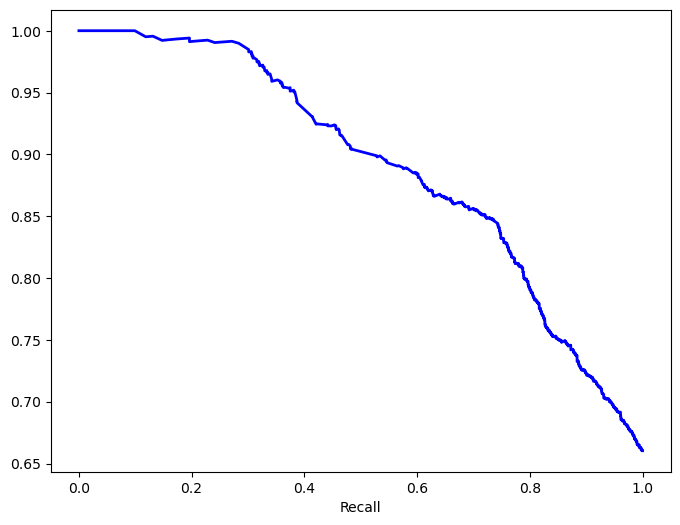

In [45]:
# Plot Precision-Recall Curve for the best model
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt

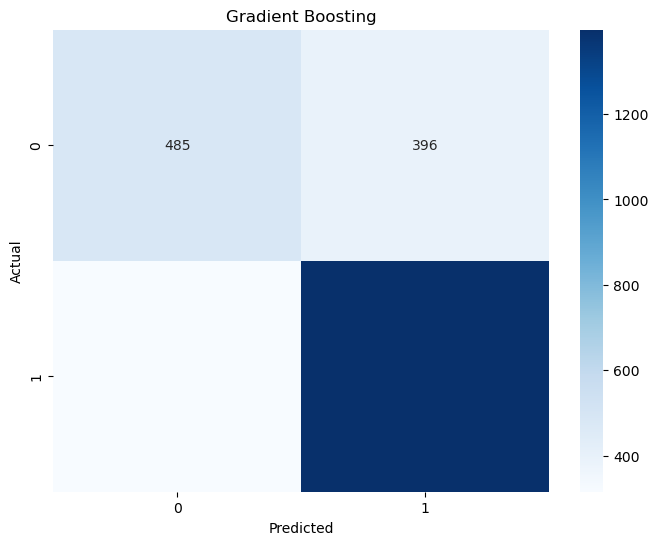

In [46]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Generate and plot the confusion matrix for the Gradient Boosting model
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')

In [47]:
# Generate the confusion matrix for the Gradient Boosting model
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Print the confusion matrix
print("Confusion Matrix for Gradient Boosting:")
print(cm_gb)

Confusion Matrix for Gradient Boosting:
[[ 485  396]
 [ 316 1397]]


In [49]:
# Guardar el modelo Gradient Boosting, el codificador One-Hot y el escalador en archivos pkl
joblib.dump(gb_clf, 'gradient_boosting_model.pkl')
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Modelo, codificador One-Hot y escalador guardados en la carpeta Notebook")


Modelo, codificador One-Hot y escalador guardados en la carpeta Notebook


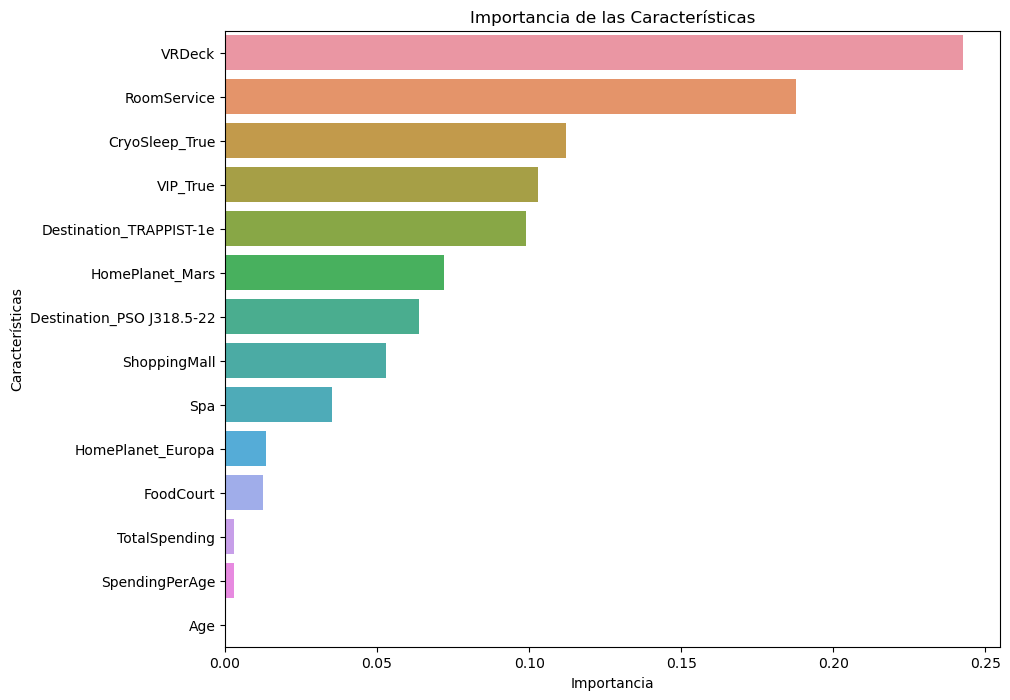

In [51]:
# Extraer las características más relevantes
feature_importances = gb_clf.feature_importances_
feature_names = one_hot_encoder.get_feature_names_out(['HomePlanet', 'CryoSleep', 'Destination', 'VIP']).tolist() + ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age', 'TotalSpending', 'SpendingPerAge']

# Crear un DataFrame con las importancias de las características
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()